In [ ]:
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/fh_5yrs.csv")

In [ ]:
filter_apple = df['symbol'] == 'AAPL'
df_apple = df[filter_apple]
df_apple.head(1000)

,date,volume,open,high,low,close,adjclose,symbol
11610,2020-07-02,28484300,367.850006,370.470001,363.640015,364.109985,364.109985,AAPL
11611,2020-07-01,27684300,365.119995,367.359985,363.910004,364.109985,364.109985,AAPL
11612,2020-06-30,35055800,360.079987,365.980011,360.000000,364.799988,364.799988,AAPL
11613,2020-06-29,32661500,353.250000,362.170013,351.279999,361.779999,361.779999,AAPL
11614,2020-06-26,51314200,364.410004,365.320007,353.019989,353.630005,353.630005,AAPL
...,...,...,...,...,...,...,...,...
12605,2016-07-20,26276000,100.000000,100.459999,99.739998,99.959999,94.010345,AAPL
12606,2016-07-19,23779900,99.559998,100.000000,99.339996,99.870003,93.925690,AAPL
12607,2016-07-18,36493900,98.699997,100.129997,98.599998,99.830002,93.888084,AAPL
12608,2016-07-15,30137000,98.919998,99.300003,98.500000,98.779999,92.900566,AAPL


In [ ]:
df_apple['date'] = pd.to_datetime(df_apple['date'], errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_apple.isnull().sum()

In [ ]:
tam = len(df_apple)
tam_val = int(0.2 * tam)
tam_test = int(0.2 * tam)
tam_train = int(tam - (tam_val + tam_test))

In [ ]:
np.random.seed(2)
indice = np.arange(tam)
np.random.shuffle(indice)
df_shuffled = df_apple.iloc[indice]

In [ ]:
df_train = df_shuffled.iloc[:tam_train].copy() 
df_val = df_shuffled.iloc[tam_train:tam_train+tam_val].copy()
df_test = df_shuffled.iloc[tam_train+tam_val:].copy()

In [ ]:
print('dimensiones del df_apple: ' + str(df_apple.shape))
print('dimensiones del df_train: ' + str(df_train.shape))
print('dimensiones del df_test: ' + str(df_test.shape))
print('dimensiones del df_val: ' + str(df_val.shape))

dimensiones del df_apple: (1385, 8)
dimensiones del df_train: (831, 8)
dimensiones del df_test: (277, 8)
dimensiones del df_val: (277, 8)


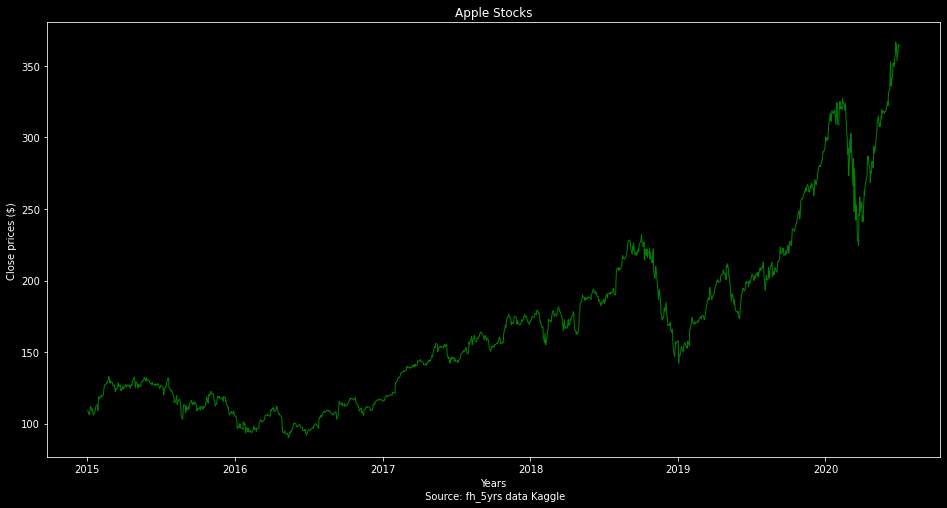

In [ ]:
with plt.style.context('dark_background'):  
  plt.figure(figsize=(16,8))
  plt.plot(df_apple['date'].iloc[::-1], df_apple['close'].iloc[::-1], color='g',linewidth=1)
  plt.title('Apple Stocks')
  plt.xlabel('Years\n Source: fh_5yrs data Kaggle')
  plt.ylabel('Close prices ($)')
  plt.show()

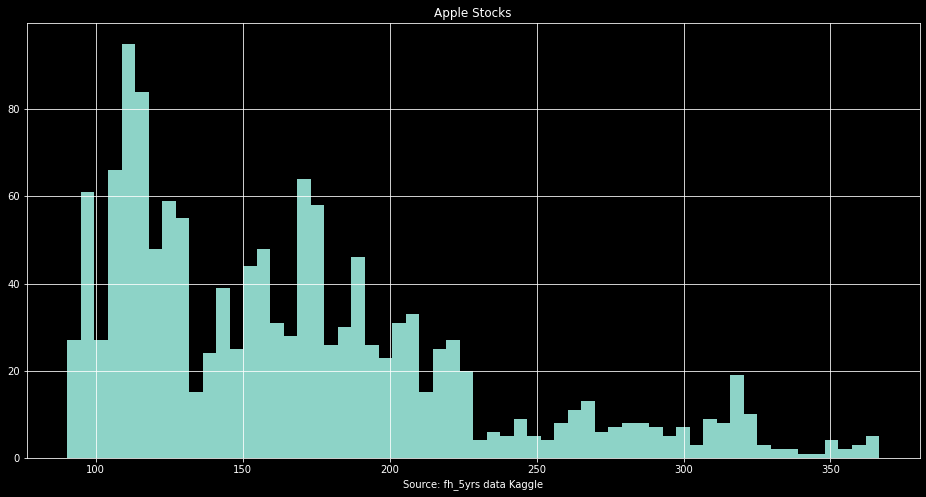

In [ ]:
with plt.style.context('dark_background'):  
  plt.figure(figsize=(16,8))
  plt.hist(df_apple['close'], bins=60)
  plt.title('Apple Stocks')
  plt.xlabel('Source: fh_5yrs data Kaggle')
  plt.grid() 
  plt.show()

In [ ]:
def dejar_solo_cifras(txt):
  return "".join(c for c in txt if c.isdigit())

In [ ]:
data_of = df_train.date.map(dejar_solo_cifras)

In [ ]:
data_of.astype(float)

12540    20161020.0
11809    20190918.0
12969    20150209.0
12471    20170131.0
11997    20181218.0
            ...    
12929    20150408.0
11613    20200629.0
12461    20170214.0
12312    20170918.0
12252    20171212.0
Name: date, Length: 831, dtype: float64

In [ ]:
data_x = data_of.head(100).values.reshape(-1, 1)
data_y = df_train[['close']].head(100).values

In [ ]:
x_test = data_of.head(20).values.reshape(-1, 1)
y_test = df_train[['close']].head(20).values

In [ ]:
# Declaracion del objeto de regresion lineal
linear_regression = LinearRegression()
# Entrenamiento del modelo
linear_regression.fit(data_x, data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linear_regression.coef_

array([[0.00263644]])

In [ ]:
filter_apple1 = df['symbol'] == 'AAPL'
df_apple1 = df[filter_apple]
dt = df_apple1.date.map(dejar_solo_cifras)

In [ ]:
dt.iloc[::-1].head(120).astype(float)

12994    20150102.0
12993    20150105.0
12992    20150106.0
12991    20150107.0
12990    20150108.0
            ...    
12879    20150618.0
12878    20150619.0
12877    20150622.0
12876    20150623.0
12875    20150624.0
Name: date, Length: 120, dtype: float64

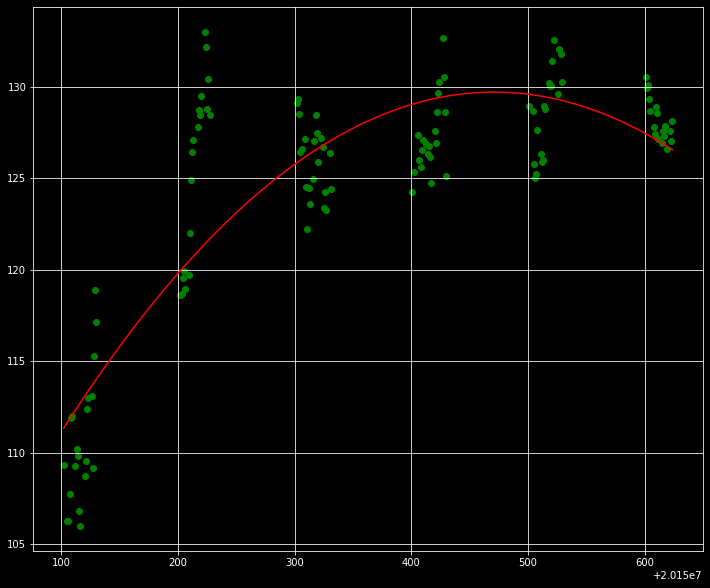

In [ ]:
with plt.style.context('dark_background'): 
  x = dt.iloc[::-1].head(120).astype(float)
  y =  df_apple['close'].iloc[::-1].head(120)
  mymodel = np.poly1d(np.polyfit(x,y,2)) 
  myline = np.linspace(20150102.0, 20150624.0, 100)
  fig, ax = plt.subplots(figsize=(12,10))
  plt.scatter(x, y, c= 'g')
  plt.plot(myline, mymodel(myline), c='r')
  plt.grid(axis='both')
  plt.show()

In [ ]:
y_pred

array([[132.00333393],
       [210.82770195],
       [103.50075039],
       [156.02396464],
       [185.2542064 ],
       [184.70055341],
       [103.48229529],
       [183.38760487],
       [184.98528923],
       [236.38537884],
       [131.72914387],
       [104.00694741],
       [105.65472419],
       [156.76744152],
       [208.72909345],
       [129.64635403],
       [208.69218325],
       [209.76257904],
       [104.04122117],
       [158.87923223]])

In [ ]:
y_pred = linear_regression.predict(x_test)

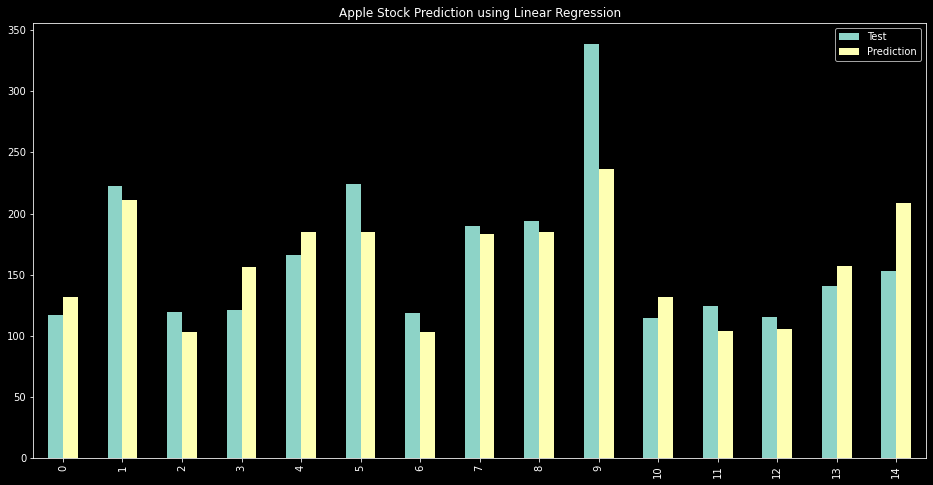

In [215]:
with plt.style.context('dark_background'): 
  array = np.concatenate((y_test, y_pred), axis = 1)
  data = pd.DataFrame(array, columns=['Test', 'Prediction'])
  data.head(15).plot(kind='bar',figsize=(16,8))
  plt.title('Apple Stock Prediction using Linear Regression')
  plt.show()